In [1]:
import os
import pandas as pd
from yaml import safe_load

# Dossier contenant les runs MLflow (expérience 0)
mlruns_path = "mlruns/0"

# Liste pour stocker les données combinées
combined_data = []

# Parcours des sous-dossiers de runs
for run_id in os.listdir(mlruns_path):
    run_dir = os.path.join(mlruns_path, run_id)
    if not os.path.isdir(run_dir):
        continue

    # Dictionnaire pour stocker les données de ce run
    run_data = {"run_id": run_id}

    # Récupération des params
    params_path = os.path.join(run_dir, "params")
    if os.path.exists(params_path):
        for param_file in os.listdir(params_path):
            with open(os.path.join(params_path, param_file), "r") as f:
                value = f.read().strip()
                run_data[param_file] = value  # clé = nom du paramètre

    # Récupération des metrics (dernière valeur de chaque métrique)
    metrics_path = os.path.join(run_dir, "metrics")
    if os.path.exists(metrics_path):
        for metric_file in os.listdir(metrics_path):
            with open(os.path.join(metrics_path, metric_file), "r") as f:
                lines = [line.strip() for line in f if line.strip()]
                if lines:
                    # Format: step timestamp value (on prend la dernière ligne)
                    last_value = float(lines[-1].split(" ")[1])
                    run_data[metric_file] = last_value  # clé = nom de la métrique

    combined_data.append(run_data)

# Création du DataFrame combiné
combined_df = pd.DataFrame(combined_data)


combined_df

,run_id,beta,unlearn,seed,unlearn_lr,class_to_replace,quantile,num_indexes_to_replace,dataset,unlearn_epochs,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,cc8db00416124b8d8df5b49e3b37e0c3,0.9,NGPlus,2,0.0001,-1,0.5,2250,cifar10,3,...,0.956000,0.984889,0.880889,76.57,1.717255,98.488889,16.61,0.900889,98.152047,93.04
1,c3f8971312dd4615ba99b515410a0879,0.9,SalGrad,3,0.0001,-1,0.5,2250,cifar10,10,...,0.741778,0.961333,0.886667,76.76,1.205698,96.133333,15.94,0.896000,98.554386,93.62
2,ac0e21328aa740b6a3526ede478d6b05,0.9,VarGrad,3,0.0001,-1,0.5,22500,cifar10,4,...,0.867289,0.921067,0.787378,64.05,3.219902,92.106667,21.63,0.781644,92.884444,87.28
3,0cfd6177aa6d4427b8e673907b17c48b,0.9,ProbGrad,3,0.0001,0,0.5,3500,cifar10,4,...,0.495714,0.180000,0.554571,71.33,3.102416,18.000000,6.72,0.538857,91.824096,83.00
4,eb26919d178f4277867d31d35935f185,0.9,ProbGrad,1,0.0001,-1,0.5,2250,cifar10,6,...,0.848000,0.906667,0.865333,76.69,1.993381,90.666667,11.74,0.880444,96.622222,90.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,695f3ee6b34b407884c61a6357f25f75,0.9,VarGrad,1,0.0001,-1,0.5,22500,cifar10,6,...,0.639022,0.902533,0.803644,63.87,3.201483,90.253333,18.27,0.792267,91.391111,85.46
1094,47dd90c713fc46419eb56ebe3a310f3c,0.9,ProbGrad,1,0.0001,0,0.5,1900,cifar10,6,...,0.443684,0.280000,0.546316,69.50,0.822397,28.000000,6.82,0.536842,90.069606,83.14
1095,c5f16def5e214995a2ac99ca29c3f1ea,0.9,NGPlus,1,0.0001,0,0.5,1900,cifar10,6,...,0.081579,0.763684,0.497368,73.77,0.620136,76.368421,12.89,0.523158,95.647332,89.30
1096,2a239d4932ce407eb02f39b93d256667,0.9,SalGrad,2,0.0001,-1,0.3,2250,cifar10,2,...,0.780889,0.986667,0.890667,76.67,0.827404,98.666666,16.72,0.909778,98.535673,93.44


In [2]:
os.listdir(mlruns_path)

['cc8db00416124b8d8df5b49e3b37e0c3',
 'c3f8971312dd4615ba99b515410a0879',
 'ac0e21328aa740b6a3526ede478d6b05',
 '0cfd6177aa6d4427b8e673907b17c48b',
 'eb26919d178f4277867d31d35935f185',
 'a5b796051e5b4970acf3a0b5046ca584',
 '161d46e318ff4ae28db9bf1579ea0f16',
 '6675b5f020b040f184d24077fe3844c4',
 '5ea22e1a96e542849488b88a2e639a33',
 '5876ce20abf745a4a65a2ceec619206f',
 '123e1fcf1d6d4bba81a0d33d9568c56d',
 '77c0ba736d78414b8b61590cf7dfe124',
 'c2f03b3a044b47b3b04db976fcd1e1e4',
 'c56ec27b8da74a60b142a7eb510872ba',
 '5ea7abbc5daf44e09d0f1d99dbd91b35',
 'fa71a1e0c36b4da5b41185583856dad3',
 'bd444e69562842a1bb39bb85d40cb2c4',
 '26474fa9e7dc42a1812dece24f235c8b',
 'd532530b55484d2ab3543f5a62828d03',
 '24631808f5204f839c996af56c9a84c4',
 'efc4db42e39242e1813ea0c8c1b3364e',
 'c6614736f0824988987c915bc7b90fcf',
 '7cb0a58b3de74658872b180635934284',
 'd1df002cb2794763b31b7047ea71481b',
 '483d9bcd13fa4788b19b7d194a9282df',
 '8769db9406ca4de6943b65338aa9fa2b',
 '22811a57316a49fda24820a8f7121ddf',
 

In [3]:
combined_df

,run_id,beta,unlearn,seed,unlearn_lr,class_to_replace,quantile,num_indexes_to_replace,dataset,unlearn_epochs,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,cc8db00416124b8d8df5b49e3b37e0c3,0.9,NGPlus,2,0.0001,-1,0.5,2250,cifar10,3,...,0.956000,0.984889,0.880889,76.57,1.717255,98.488889,16.61,0.900889,98.152047,93.04
1,c3f8971312dd4615ba99b515410a0879,0.9,SalGrad,3,0.0001,-1,0.5,2250,cifar10,10,...,0.741778,0.961333,0.886667,76.76,1.205698,96.133333,15.94,0.896000,98.554386,93.62
2,ac0e21328aa740b6a3526ede478d6b05,0.9,VarGrad,3,0.0001,-1,0.5,22500,cifar10,4,...,0.867289,0.921067,0.787378,64.05,3.219902,92.106667,21.63,0.781644,92.884444,87.28
3,0cfd6177aa6d4427b8e673907b17c48b,0.9,ProbGrad,3,0.0001,0,0.5,3500,cifar10,4,...,0.495714,0.180000,0.554571,71.33,3.102416,18.000000,6.72,0.538857,91.824096,83.00
4,eb26919d178f4277867d31d35935f185,0.9,ProbGrad,1,0.0001,-1,0.5,2250,cifar10,6,...,0.848000,0.906667,0.865333,76.69,1.993381,90.666667,11.74,0.880444,96.622222,90.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,695f3ee6b34b407884c61a6357f25f75,0.9,VarGrad,1,0.0001,-1,0.5,22500,cifar10,6,...,0.639022,0.902533,0.803644,63.87,3.201483,90.253333,18.27,0.792267,91.391111,85.46
1094,47dd90c713fc46419eb56ebe3a310f3c,0.9,ProbGrad,1,0.0001,0,0.5,1900,cifar10,6,...,0.443684,0.280000,0.546316,69.50,0.822397,28.000000,6.82,0.536842,90.069606,83.14
1095,c5f16def5e214995a2ac99ca29c3f1ea,0.9,NGPlus,1,0.0001,0,0.5,1900,cifar10,6,...,0.081579,0.763684,0.497368,73.77,0.620136,76.368421,12.89,0.523158,95.647332,89.30
1096,2a239d4932ce407eb02f39b93d256667,0.9,SalGrad,2,0.0001,-1,0.3,2250,cifar10,2,...,0.780889,0.986667,0.890667,76.67,0.827404,98.666666,16.72,0.909778,98.535673,93.44


183


/var/folders/17/d5wm_d6x5zv68h4w18r3246h4xmqkj/T/ipykernel_2643/3042057372.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(methods))


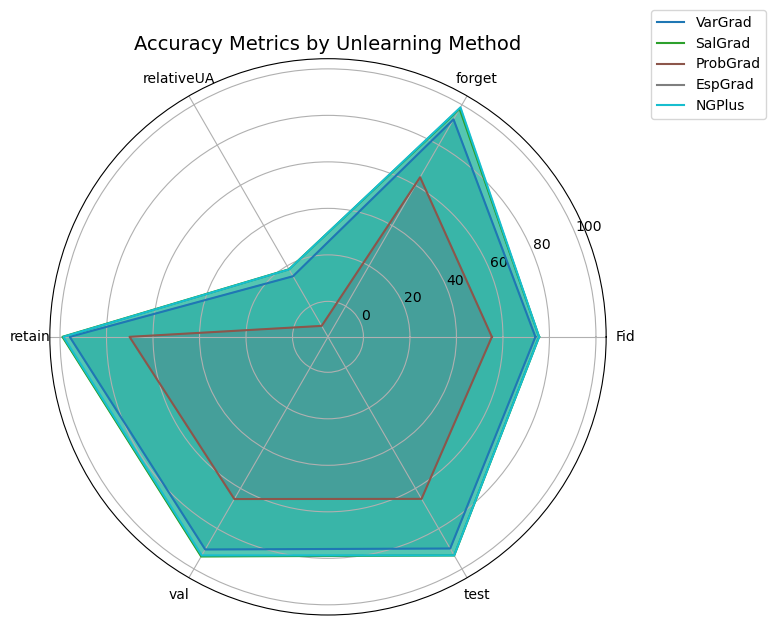

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = combined_df.copy()
df = df[(df["num_indexes_to_replace"] == "4500") & (df["unlearn"] != "FocalGrad")]
# df['relativeUA'] = 100 - df['relativeUA'].astype(float)
print(len(df))

# --- Étape 1 : sélectionner les colonnes d'accuracy ---
accuracy_cols = ['Fid','forget',
       'relativeUA', 'retain', 'val', 'test']
methods = df["unlearn"].unique()
methods = ["VarGrad", "SalGrad", "ProbGrad", "EspGrad", "NGPlus"]

# --- Étape 2 : calcul des moyennes par méthode ---
method_means = df.groupby("unlearn")[accuracy_cols].mean()

# --- Étape 3 : construction du radar plot ---
# Préparation des angles
labels = accuracy_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # boucle fermée

# Style
plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

# Couleurs pour les différentes méthodes
colors = plt.cm.get_cmap("tab10", len(methods))

# Tracer chaque méthode
for idx, method in enumerate(methods):
    try:
        values = method_means.loc[method].tolist()
        values += values[:1]  # boucle fermée
        plt.plot(angles, values, label=method, color=colors(idx))
        plt.fill(angles, values, alpha=0.5, color=colors(idx))
    except KeyError:
        print(f"Warning: Method '{method}' not found in the DataFrame.")

# Labels axes
plt.xticks(angles[:-1], labels)
plt.title("Accuracy Metrics by Unlearning Method", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [5]:
df.columns

Index(['run_id', 'beta', 'unlearn', 'seed', 'unlearn_lr', 'class_to_replace',
       'quantile', 'num_indexes_to_replace', 'dataset', 'unlearn_epochs',
       'arch', 'model', 'save_dir', 'MIA_confidence', 'test', 'MIA_prob',
       'MIA_correctness', 'MIA_m_entropy', 'Fid', 'RTE', 'forget',
       'relativeUA', 'MIA_entropy', 'retain', 'val'],
      dtype='object')

In [6]:
df["unlearn_epochs"] = df["unlearn_epochs"].astype(int)
df.sort_values(by="unlearn_epochs", inplace=True)

# Index(['run_id', 'beta', 'unlearn_method', 'unlearn', 'unlearn_lr', 'quantile',
#    'num_indexes_to_replace', 'unlearn_epochs', 'model', 'save_dir', 'seed',
#    'class_to_replace', 'dataset', 'arch', 'MIA_confidence', 'test',
#    'MIA_prob', 'MIA_correctness', 'MIA_m_entropy', 'Fid', 'RTE', 'forget',
#    'relativeUA', 'MIA_entropy', 'retain', 'val'],
#   dtype='object')

# convert all metrics to float
for col in df.columns:
    if col not in ["run_id", "unlearn", "unlearn_method", "model", "save_dir", "num_indexes_to_replace", "class_to_replace", "unlearn_epochs", "dataset", "arch"]:
        print(col)
        df[col] = df[col].astype(float)
# mean with respect to seed
df_mean = df.groupby(["run_id", "unlearn", "model", "save_dir", "num_indexes_to_replace", "class_to_replace", "unlearn_epochs", "dataset", "arch"]).mean().reset_index()
df_mean

beta
seed
unlearn_lr
quantile
MIA_confidence
test
MIA_prob
MIA_correctness
MIA_m_entropy
Fid
RTE
forget
relativeUA
MIA_entropy
retain
val


,run_id,unlearn,model,save_dir,num_indexes_to_replace,class_to_replace,unlearn_epochs,dataset,arch,beta,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,01f1ee0280114ae4985303b1e014aa06,VarGrad,./results/cifar10/cifar10_resnet18_2model.pth.tar,./results/cifar10,4500,-1,5,cifar10,resnet18,0.9,...,0.521111,0.898444,0.762889,73.23,1.887365,89.844444,10.11,0.782222,92.051852,86.66
1,01fdb5727d004e119330b71435042d7b,VarGrad,./results/cifar10/cifar10_resnet18_1model.pth.tar,./results/cifar10,4500,-1,3,cifar10,resnet18,0.9,...,0.735556,0.942889,0.813111,71.95,1.506269,94.288889,16.23,0.831333,95.190123,89.40
2,0243c789fa8c4239aa248b14754eaaed,SalGrad,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,4500,-1,10,cifar10,resnet18,0.9,...,0.867556,0.971778,0.894444,76.68,1.672474,97.177778,17.29,0.904000,98.851852,93.90
3,04271791debf4fd58bd1bc6ba08937b0,SalGrad,./results/cifar10/cifar10_resnet18_2model.pth.tar,./results/cifar10,4500,-1,6,cifar10,resnet18,0.9,...,0.868444,0.978889,0.876889,76.02,2.978011,97.888889,17.13,0.896222,98.696296,93.82
4,05f59a5a4f5a4c8996da9fab5755c535,NGPlus,./results/cifar10/cifar10_resnet18_1model.pth.tar,./results/cifar10,4500,-1,3,cifar10,resnet18,0.9,...,0.867778,0.985333,0.882000,73.58,1.500080,98.533333,20.10,0.902889,98.666667,93.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,f85237815d0d409eae2538a60e4577a2,NGPlus,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,4500,-1,9,cifar10,resnet18,0.9,...,0.868000,0.987778,0.877778,76.54,1.442307,98.777778,17.21,0.897556,98.479012,93.48
179,fa785a3f61444ebc86bac3201cae5afd,NGPlus,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,4500,-1,7,cifar10,resnet18,0.9,...,0.867333,0.987111,0.874222,76.51,1.400625,98.711111,17.14,0.894889,98.372840,93.46
180,fc71697a78b7437da3737c61260599b6,NGPlus,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,4500,-1,1,cifar10,resnet18,0.9,...,0.968222,0.992667,0.909556,76.84,3.501413,99.266667,18.12,0.927556,99.177778,94.40
181,fe21bfebb4654f499a6c831d934a7091,NGPlus,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,4500,-1,4,cifar10,resnet18,0.9,...,0.866889,0.986889,0.876000,76.47,1.419577,98.688889,17.12,0.894444,98.355556,93.26


In [7]:
group_cols = ["unlearn", "num_indexes_to_replace", "class_to_replace", "unlearn_epochs"]

# Vérifie qu'elles existent
group_cols = [col for col in group_cols if col in df.columns]

# Colonnes numériques sans celles du groupby
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col not in group_cols]

# Debugging
print("Group columns:", group_cols)
print("Numeric columns:", numeric_cols)
print("DataFrame shape:", df.shape)

df_mean = df[group_cols + numeric_cols].groupby(group_cols).mean().reset_index()

df_std = df[group_cols + numeric_cols].groupby(group_cols).std().reset_index()
df_mean = df_mean.merge(df_std, on=group_cols, suffixes=('', '_std'))

df_mean.sort_values(by="unlearn_epochs", inplace=True)
df_mean

Group columns: ['unlearn', 'num_indexes_to_replace', 'class_to_replace', 'unlearn_epochs']
Numeric columns: ['beta', 'seed', 'unlearn_lr', 'quantile', 'MIA_confidence', 'test', 'MIA_prob', 'MIA_correctness', 'MIA_m_entropy', 'Fid', 'RTE', 'forget', 'relativeUA', 'MIA_entropy', 'retain', 'val']
DataFrame shape: (183, 25)


,unlearn,num_indexes_to_replace,class_to_replace,unlearn_epochs,beta,seed,unlearn_lr,quantile,MIA_confidence,test,...,MIA_prob_std,MIA_correctness_std,MIA_m_entropy_std,Fid_std,RTE_std,forget_std,relativeUA_std,MIA_entropy_std,retain_std,val_std
0,EspGrad,4500,-1,1,0.9,2.0,0.0001,0.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,ProbGrad,4500,-1,1,0.9,2.0,0.0001,0.5,0.956593,93.426667,...,0.099068,0.005279,0.009743,1.847548,0.669910,0.527904,1.768229,0.007933,0.424622,0.098658
31,VarGrad,4500,-1,1,0.9,2.0,0.0001,0.4,0.960185,93.506667,...,0.072189,0.003698,0.007331,1.534076,1.023491,0.369829,1.549550,0.008340,0.410097,0.266433
21,SalGrad,4500,-1,1,0.9,2.0,0.0001,0.4,0.967889,93.850000,...,0.076068,0.003061,0.008084,1.513750,1.346636,0.306124,1.625514,0.008623,0.327418,0.090333
1,NGPlus,4500,-1,1,0.9,2.0,0.0001,0.5,0.975185,94.213333,...,0.009789,0.002934,0.012453,1.689349,0.577185,0.293412,1.775697,0.009431,0.351159,0.131149
12,ProbGrad,4500,-1,2,0.9,2.0,0.0001,0.5,0.889704,90.330000,...,0.050780,0.014406,0.007191,1.746463,0.234984,1.440565,2.336115,0.011231,1.508412,1.151694
32,VarGrad,4500,-1,2,0.9,2.0,0.0001,0.4,0.921667,91.690000,...,0.073020,0.006127,0.017410,1.598317,1.189703,0.612732,1.677101,0.014937,0.876487,0.946777
2,NGPlus,4500,-1,2,0.9,2.0,0.0001,0.5,0.950889,93.146667,...,0.052731,0.000841,0.003786,1.637712,0.133139,0.084132,1.738083,0.004468,0.261204,0.250067
22,SalGrad,4500,-1,2,0.9,2.0,0.0001,0.4,0.952296,93.183333,...,0.060803,0.001847,0.004262,1.380130,0.936843,0.184725,1.565892,0.003475,0.223446,0.122420
23,SalGrad,4500,-1,3,0.9,2.0,0.0001,0.4,0.948296,93.000000,...,0.082749,0.001247,0.005474,1.434556,0.963269,0.124656,1.561210,0.005055,0.304249,0.211943


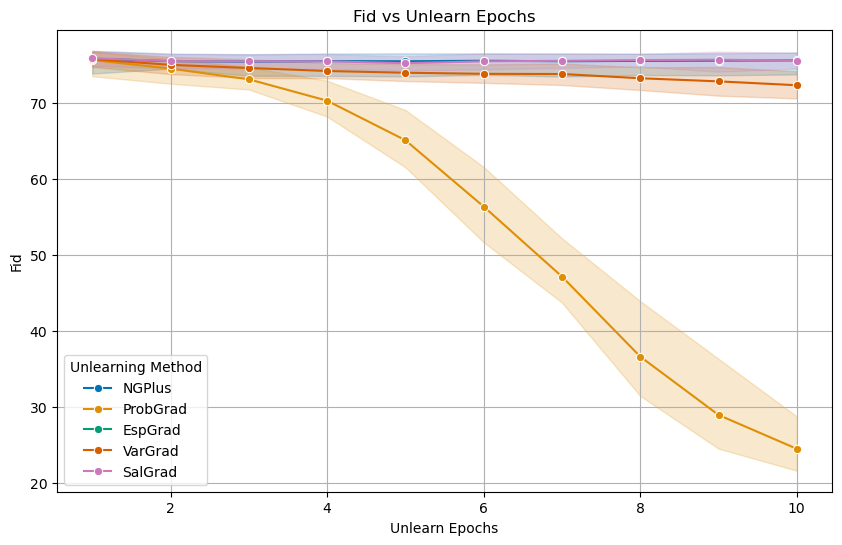

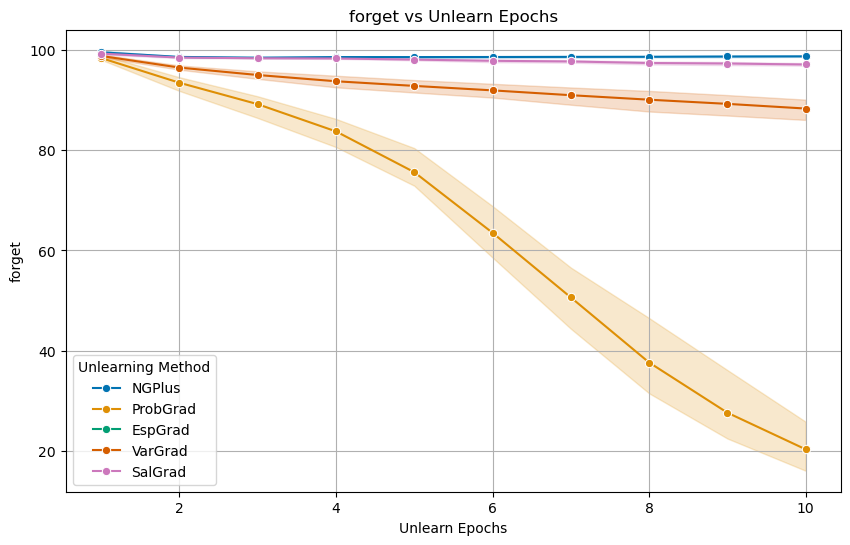

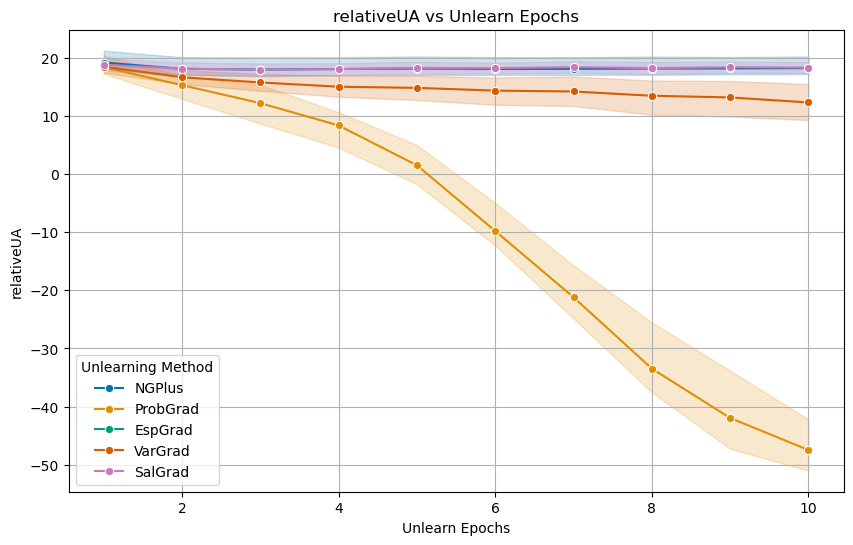

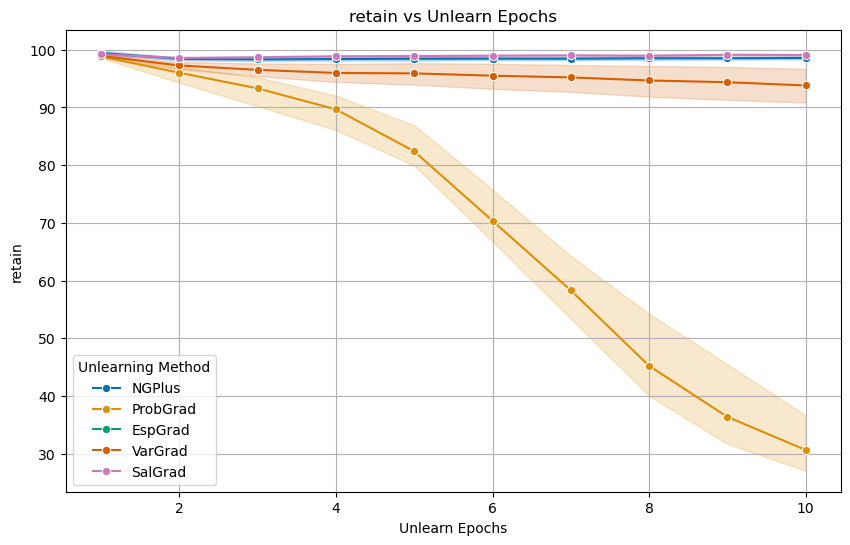

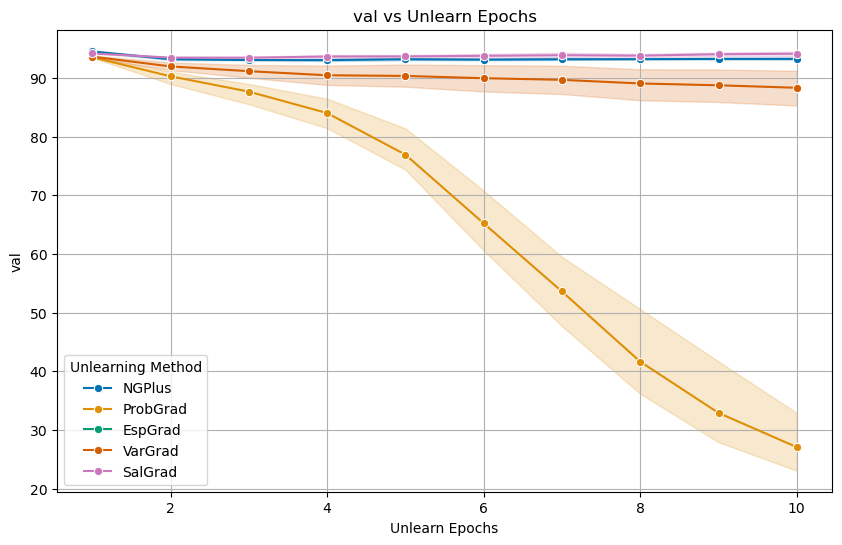

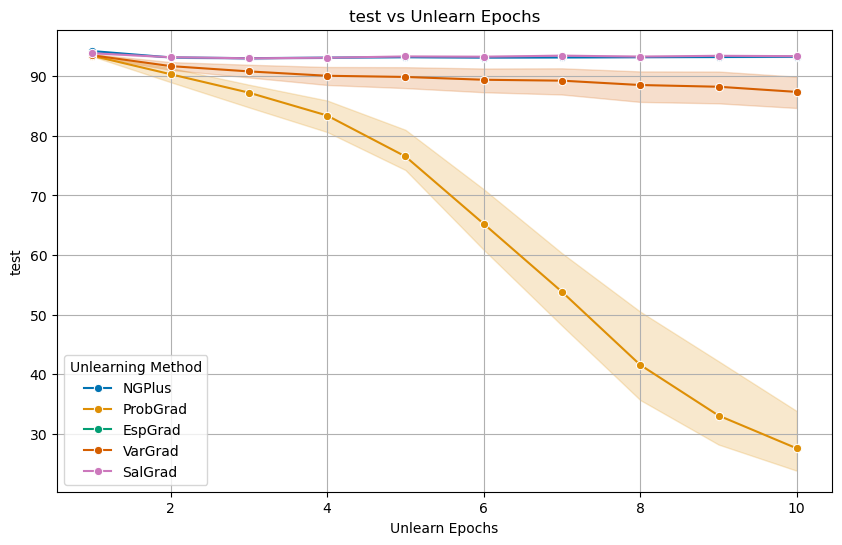

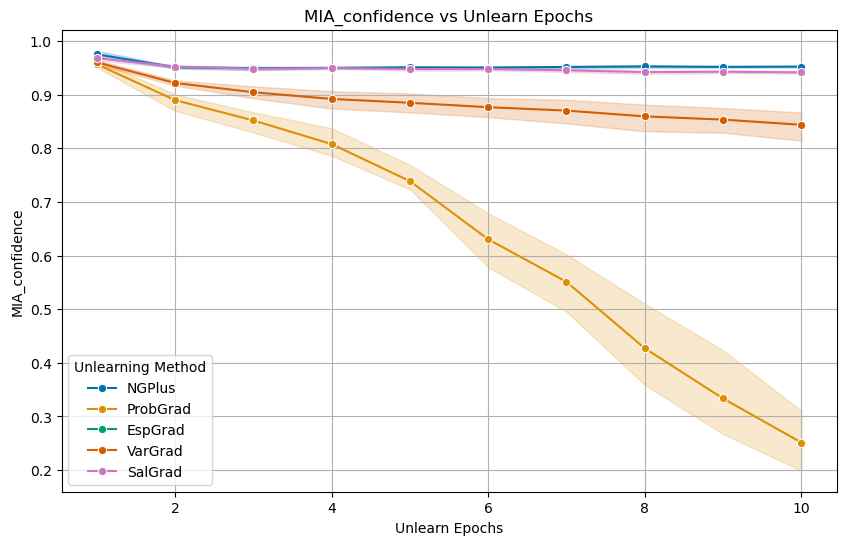

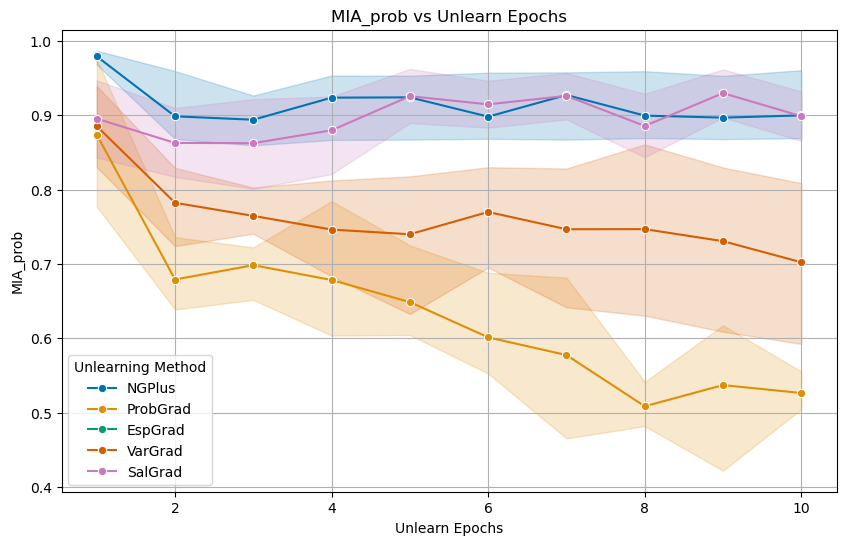

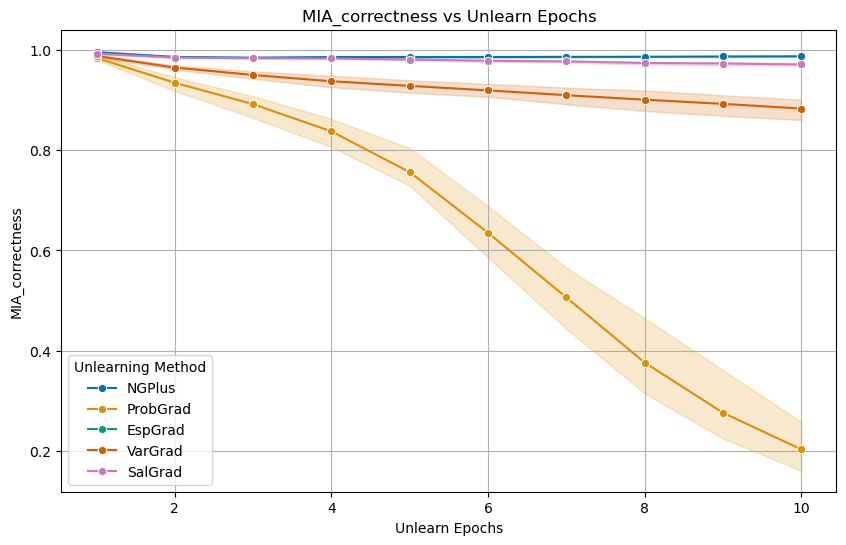

In [ ]:
# plot metrics en fonction du nombre de unlearn_epochs
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("colorblind")
for metric in ['Fid', 'forget', 'relativeUA', 'retain', 'val', 'test','MIA_confidence', 'MIA_prob', 'MIA_correctness', 'MIA_m_entropy']:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='unlearn_epochs', y=metric, hue='unlearn', marker='o', sort=True)
    plt.title(f'{metric} vs Unlearn Epochs')
    plt.xlabel('Unlearn Epochs')
    plt.ylabel(metric)
    plt.legend(title='Unlearning Method')
    plt.grid(True)
    plt.show()

Loaded vmask from ./results/cifar10/vmask/vmask_0_0.pt with shape torch.Size([64, 3, 3, 3])
Loaded vmask from ./results/cifar10/vmask/vmask_1_0.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_2_0.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_3_0.pt with shape torch.Size([64, 64, 3, 3])
Loaded vmask from ./results/cifar10/vmask/vmask_4_0.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_0_1.pt with shape torch.Size([64, 3, 3, 3])
Loaded vmask from ./results/cifar10/vmask/vmask_1_1.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_2_1.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_3_1.pt with shape torch.Size([64, 64, 3, 3])
Loaded vmask from ./results/cifar10/vmask/vmask_4_1.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_0_2.pt with shape torch.Size([64, 3, 3, 3])
Loaded vmask from ./results/cifar10/vmas

/var/folders/17/d5wm_d6x5zv68h4w18r3246h4xmqkj/T/ipykernel_23231/2046411995.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vmask = torch.load(vmask_path)


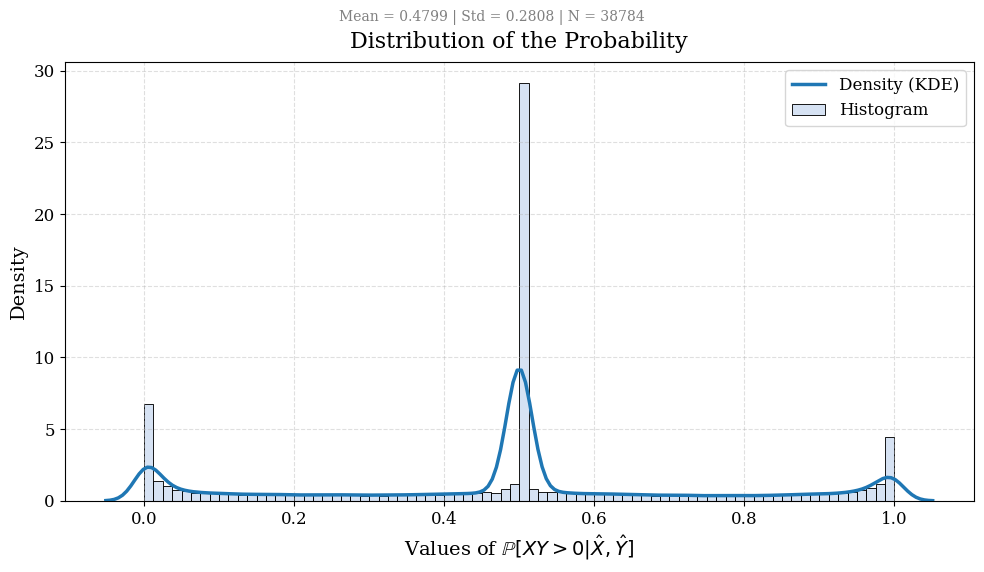

Epoch 1: Mean=0.5069, Std=0.3047, Count=38784


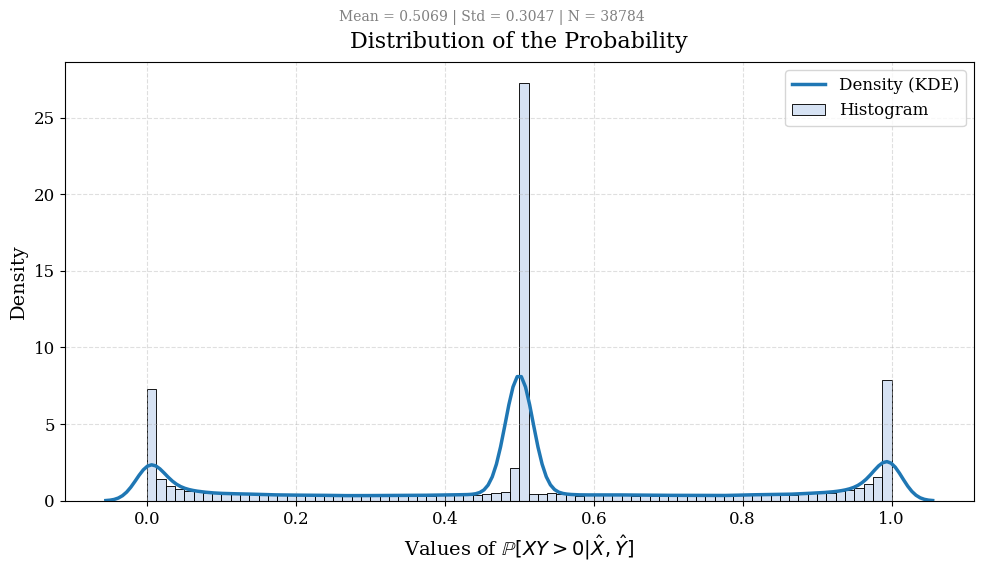

Epoch 2: Mean=0.4670, Std=0.2853, Count=38784


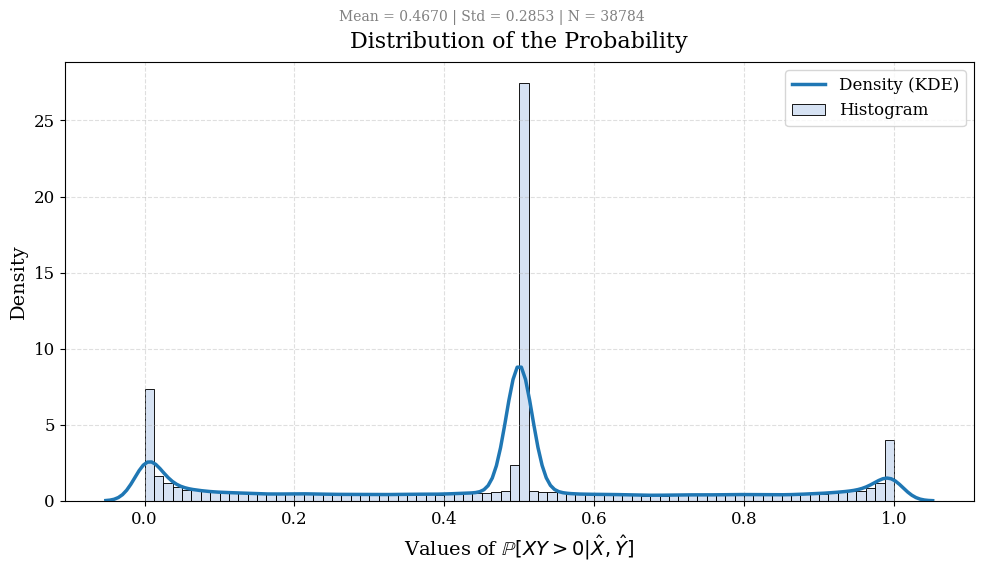

Epoch 3: Mean=0.4785, Std=0.2884, Count=38784


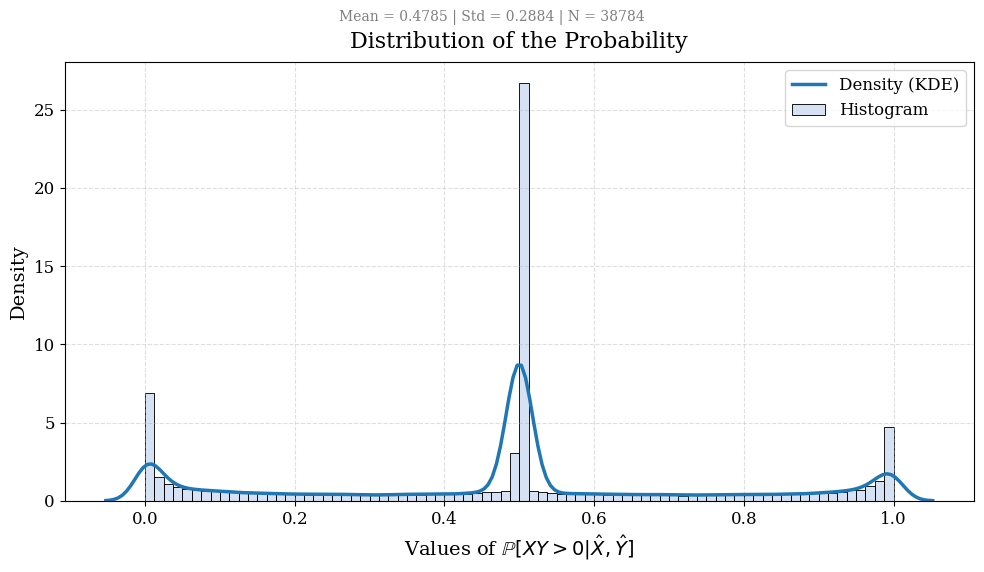

Epoch 4: Mean=0.5127, Std=0.2773, Count=38784


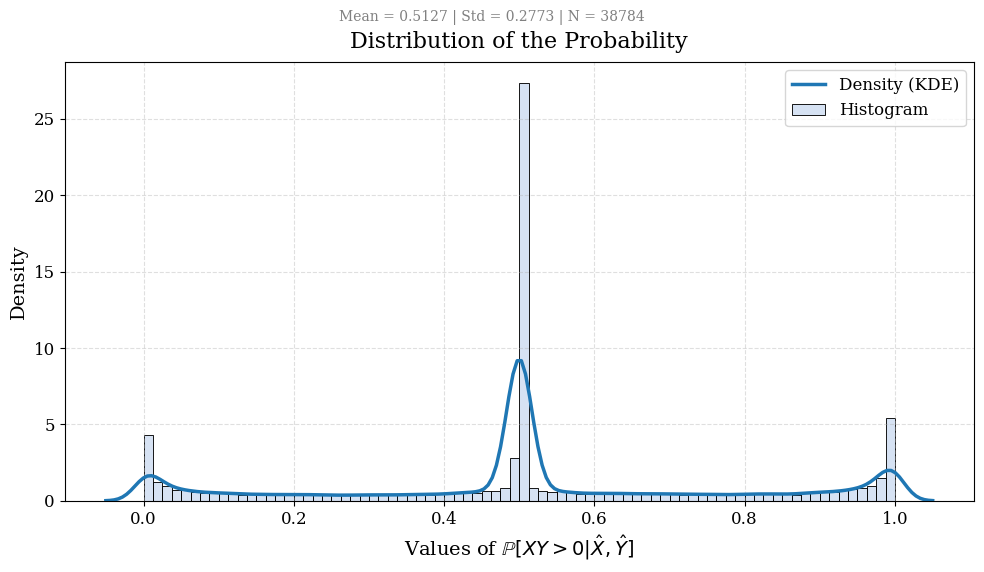

In [ ]:
import torch
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Configuration matplotlib pour rendu publication
mpl.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,  # Peut être mis à True si tu compiles en LaTeX
})

# Couleurs sobres pour publication
main_color = "#1f77b4"       # bleu scientifique
hist_color = "#aec7e8"        # bleu clair

# Chargement des tensors VMask
VMask = {}
for epoch in range(5):
    VMask[epoch] = {}
    for idx in range(5):
        vmask_path = f"./results/cifar10/vmask/vmask_{idx}_{epoch}.pt"
        if os.path.exists(vmask_path):
            vmask = torch.load(vmask_path)
            print(f"Loaded vmask from {vmask_path} with shape {vmask.shape}")
            VMask[epoch][idx] = vmask

# Affichage de la distribution avec histogramme + KDE
for epoch, masks in VMask.items():
    all_masks = torch.cat([mask.flatten() for mask in masks.values()])
    values = all_masks.cpu().numpy()
    mean_val = values.mean()
    std_val = values.std()
    count = len(values)

    print(f"Epoch {epoch}: Mean={mean_val:.4f}, Std={std_val:.4f}, Count={count}")

    plt.figure(figsize=(10, 6))

    # Histogramme
    sns.histplot(
        values,
        bins=80,
        stat="density",
        color=hist_color,
        edgecolor="black",
        alpha=0.5,
        label="Histogram"
    )

    # KDE
    sns.kdeplot(
        values,
        color=main_color,
        linewidth=2.5,
        bw_adjust=0.5,
        label="Density (KDE)"
    )

    # Titres et légendes
    plt.title("Distribution of the Probability", pad=10)
    plt.suptitle(f"Mean = {mean_val:.4f} | Std = {std_val:.4f} | N = {count}", fontsize=10, y=0.95, color='gray')

    plt.xlabel("Values of $\mathbb{P}[XY > 0| \hat X,\hat Y]$")
    plt.ylabel("Density")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()
